## 梯度下降算法求解

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

In [12]:
data = pd.read_excel("C:/Users/张武/Desktop/Python Learn/lizhixin/data.xlsx",sheet_name = "Sheet1")
data.insert(0,"ones",1)
data

,ones,pouplation,investment,production
0,1,553.7,38.03,350.80
1,1,550.5,40.79,358.89
2,1,552.3,80.83,374.69
3,1,548.7,90.78,420.10
4,1,559.3,110.72,522.80
5,1,560.5,129.48,589.56
6,1,565.3,171.92,634.94
7,1,569.3,183.41,762.10
8,1,556.7,286.77,907.95
9,1,558.0,407.72,929.60


In [13]:
#数据准备
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]
X = X.values #(14,3)
X = X.reshape(14,3)
Y = Y.values #(14,1)
Y = Y.reshape(14,1)

In [14]:
#损失函数
def costFunction(X,Y,W):
    cost = (X @ W -Y)**2
    return np.sum(cost)/(2*len(X))

In [15]:
W = np.random.randn(3,1) #初始化W为标准正态分布
cost_init = costFunction(X,Y,W)
cost_init

173359.67834344073

In [16]:
#梯度下降算法
def SGD(X,Y,W,lr,iters):
    costs = []
    for i in range(iters):
        W = W - lr * X.T @ (X @ W -Y)/len(X) #梯度下降函数
        cost = costFunction(X,Y,W)
        
        if i % 10000  == 0:
            costs.append(cost)
            print(cost)
    return W, costs

In [17]:
#初始化lr(学习率), iters(迭代次数)
lr = 0.0000005
iters = 100000

In [18]:
W, costs = SGD(X,Y,W,lr,iters)
print(W)

116472.18841320132
6675.302177404358
6675.299099813746
6675.296022226779
6675.292944643455
6675.289867063774
6675.28678948773
6675.283711915332
6675.28063434658
6675.277556781467
[[-0.57409098]
 [ 0.70926856]
 [ 1.35500825]]


Text(0.5, 1.0, 'iters vs cost')

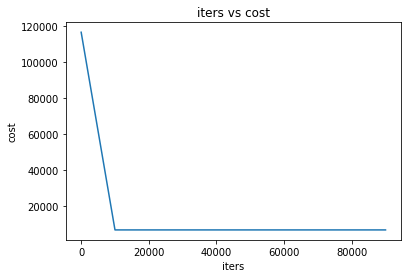

In [20]:
plt.plot(np.arange(iters,step=10000),costs)
plt.xlabel("iters")
plt.ylabel("cost")
plt.title("iters vs cost")

# 正规方程求解

In [21]:
X

array([[1.00000e+00, 5.53700e+02, 3.80300e+01],
       [1.00000e+00, 5.50500e+02, 4.07900e+01],
       [1.00000e+00, 5.52300e+02, 8.08300e+01],
       [1.00000e+00, 5.48700e+02, 9.07800e+01],
       [1.00000e+00, 5.59300e+02, 1.10720e+02],
       [1.00000e+00, 5.60500e+02, 1.29480e+02],
       [1.00000e+00, 5.65300e+02, 1.71920e+02],
       [1.00000e+00, 5.69300e+02, 1.83410e+02],
       [1.00000e+00, 5.56700e+02, 2.86770e+02],
       [1.00000e+00, 5.58000e+02, 4.07720e+02],
       [1.00000e+00, 5.71000e+02, 4.30620e+02],
       [1.00000e+00, 5.73000e+02, 5.63250e+02],
       [1.00000e+00, 5.83400e+02, 6.37910e+02],
       [1.00000e+00, 5.80200e+02, 1.05541e+03]])

In [22]:
Y

array([[ 350.8 ],
       [ 358.89],
       [ 374.69],
       [ 420.1 ],
       [ 522.8 ],
       [ 589.56],
       [ 634.94],
       [ 762.1 ],
       [ 907.95],
       [ 929.6 ],
       [1095.28],
       [1306.3 ],
       [1447.43],
       [1599.41]])

In [23]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[-6.62930178e+03],
       [ 1.26790991e+01],
       [ 9.87473744e-01]])